# Displaying Filtered Data as image

This algorithm inputs a CSV data resulted from the RSS model and analyses the data distribution

## Importing Libraries

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Inputs

In [2]:
csv_path = Path(r"H:\Meu Drive\Artigo_Mestrado\03_RSS\RSS_candidateSamples_filtered_20250612.csv")

figures_path = Path(r"H:\Meu Drive\Artigo_Mestrado\04_Figuras_Imagens")

df = pd.read_csv(csv_path, sep=",")
df.head()

,class_0,class_1,class_2,class_3,sum_pixels,modal_class,n_modal_pixels,prop,weight,centroid
0,0,0,21,21,42,3,21,0.500000,0.857143,"(800008.0005464482, 9600008.00054645)"
1,0,0,9,40,49,4,40,0.816327,1.000000,"(800068.0016393443, 9600008.00054645)"
2,0,0,6,43,49,4,43,0.877551,1.000000,"(800128.0027322405, 9600008.00054645)"
3,4,0,45,0,49,3,45,0.918367,1.000000,"(800248.0049180329, 9600008.00054645)"
4,13,0,36,0,49,3,36,0.734694,1.000000,"(800308.0060109289, 9600008.00054645)"


## 1. Filtering Data >= 50% and classifying the into sets of props

In [4]:
df = df[df['prop'] >=0.5]

df["prop_class"] = df['prop'].apply(lambda x: ((x*100)//5)*5)


## 2. Creating Histograms for each class and each prop (strata)

In [6]:
classes = ['Forest', 'Water', 'Crops', "Bare Soil"]

# Create a new column for the class names
df['Classification'] = df['modal_class'].apply(lambda x: classes[x-1])

In [7]:
hist_counts = df.groupby( ['prop_class', "Classification"] ).count()
hist_counts.head()

class_0  class_1  class_2  class_3  sum_pixels  \
prop_class Classification                                                   
50.0       Bare Soil         12999    12999    12999    12999       12999   
           Crops             28922    28922    28922    28922       28922   
           Forest            18693    18693    18693    18693       18693   
           Water              1354     1354     1354     1354        1354   
55.0       Bare Soil         19173    19173    19173    19173       19173   

                           modal_class  n_modal_pixels   prop  weight  \
prop_class Classification                                               
50.0       Bare Soil             12999           12999  12999   12999   
           Crops                 28922           28922  28922   28922   
           Forest                18693           18693  18693   18693   
           Water                  1354            1354   1354    1354   
55.0       Bare Soil             19173           19173  19173   19173   

                           centroid  
prop_class Classification            
50.0       Bare Soil          12999  
           Crops              28922  
           Forest             18693  
           Water               1354  
55.0       Bare Soil          19173

In [8]:
props = [ "50-55%", "55-60%", "60-65%", "65-70%", "70-75%", "75-80%", "80-85%", "85-90%", "90-95%", "95-100%" , "100%"]
palette = [
    "#fa0707",  # Red
    "#64eb34",  # Greeeen
    "#2ca02c",  # Green
    "#0714fa",  # Blue
]
fontsize = 12

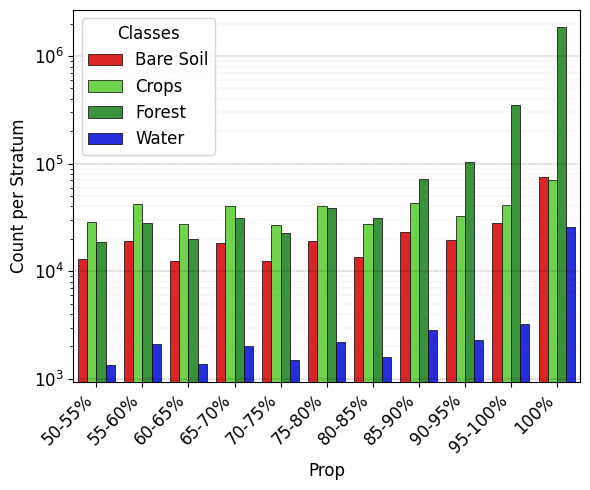

In [10]:
# Plot the histogram
plt.figure(figsize=(6, 5))

sns.barplot(x=hist_counts.index.get_level_values(0), y=hist_counts['prop'], hue=hist_counts.index.get_level_values(1), palette=palette,edgecolor='black', linewidth=0.5)
#plt.title('Histogram of Percentage by Frequency Class', fontsize=fontsize+2)

# Rename the x-axis ticks
plt.xticks(ticks=np.arange(len(props)), labels=props, rotation=45, ha='right', fontsize=fontsize)
plt.xlabel('Prop', fontsize=fontsize)
plt.ylabel('Count per Stratum', fontsize=fontsize)

plt.legend(title='Classes', fontsize=fontsize, title_fontsize=str(fontsize), loc='upper left')


# Y-axis in log scale
plt.yscale('log')
# Set font size for y-axis
plt.tick_params(axis='y', labelsize=fontsize)

# Add y-axis grid lines
plt.grid(axis='y', linestyle='--',which="major", alpha=0.7, color='black', linewidth =0.3)
plt.grid(axis='y', linestyle='--',which="minor", alpha=0.4, color='gray', linewidth =0.3)

plt.tight_layout()

name_out = Path(figures_path, "histogram_per_stratum_BARPLOT.pdf")
plt.savefig(name_out, dpi=300, bbox_inches='tight')

plt.show()


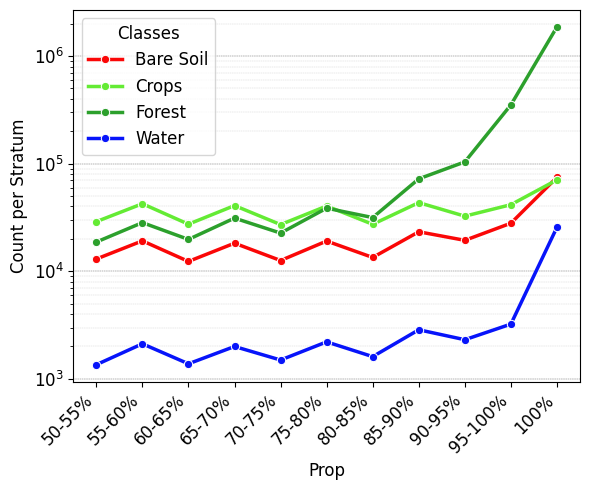

In [11]:
plt.figure(figsize=(6, 5))

sns.lineplot(x=hist_counts.index.get_level_values(0), y=hist_counts['prop'], hue=hist_counts.index.get_level_values(1), palette=palette, marker='o', linewidth=2.5)



plt.xlabel('Prop', fontsize=fontsize)
plt.ylabel('Count per Stratum', fontsize=fontsize)

plt.legend(title='Classes', fontsize=fontsize, title_fontsize=str(fontsize), loc='upper left')

# Rename the x-axis ticks
plt.xticks(ticks=np.arange(len(props))*5+50, labels=props, rotation=45, ha='right', fontsize=fontsize)

# Y-axis in log scale
plt.yscale('log')
# Set font size for y-axis
plt.tick_params(axis='y', labelsize=fontsize)

# Add y-axis grid lines
plt.grid(axis='y', linestyle='--',which="major", alpha=0.7, color='black', linewidth =0.3)
plt.grid(axis='y', linestyle='--',which="minor", alpha=0.4, color='gray', linewidth =0.3)

plt.tight_layout()

name_out = Path(figures_path, "histogram_per_stratum_LINEPLOT.pdf")
#plt.savefig(name_out, dpi=300, bbox_inches='tight')

plt.show()

# Table

In [14]:
df_table = hist_counts['sum_pixels']

In [16]:
df_table.T

prop_class  Classification
50.0        Bare Soil           12999
            Crops               28922
            Forest              18693
            Water                1354
55.0        Bare Soil           19173
            Crops               42449
            Forest              28328
            Water                2118
60.0        Bare Soil           12344
            Crops               27381
            Forest              19771
            Water                1380
65.0        Bare Soil           18237
            Crops               40793
            Forest              31198
            Water                1999
70.0        Bare Soil           12588
            Crops               27150
            Forest              22635
            Water                1496
75.0        Bare Soil           19096
            Crops               40417
            Forest              38597
            Water                2207
80.0        Bare Soil           13437
            Crops      